In [19]:
# %load_ext autoreload
# %autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys
sys.path.append('../')


import importlib
import sys
import pickle

import utils.plotting as plotting
importlib.reload(plotting)


/tmp/ipykernel_133011/2170841146.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


100%|██████████| 30/30 [00:00<00:00, 153.99it/s]


In [20]:
real_label = r'\textsc{Geant4}'
ddpm_label = r'\textsc{CaloClouds}'
edm_label = r'\textsc{CaloClouds II}'
cm_label = r'\textsc{CaloClouds II (CM)}'

# load pickled dicts

In [21]:
pickle_path = 'BEEGFS/6_PointCloudDiffusion/output/singleE/pickle/'
min_energy_list = [10, 50, 90]
max_energy_list = [10, 50, 90]

dict_list = []
real_list_list = []
fakes_list_list = []
for j in range(len(min_energy_list)):
    min_energy = min_energy_list[j]
    max_energy = max_energy_list[j]
    with open(pickle_path+'dict_{}-{}GeV.pickle'.format(str(min_energy), str(max_energy)), 'rb') as f:
        dict = pickle.load(f)
    dict_list.append(dict)
    real_list_list.append(dict['real_list'])
    fakes_list_list.append(dict['fakes_list'])
    
print('dicts loaded')
print(dict_list[0].keys())

dicts loaded
dict_keys(['real_list', 'fakes_list', 'c_cog_real', 'c_cog_fake'])


In [22]:
# mean occ of 50 GeV CM model
fakes_list_list[2][1][2].mean()

1161.3775

# Plotting

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 153.07it/s]


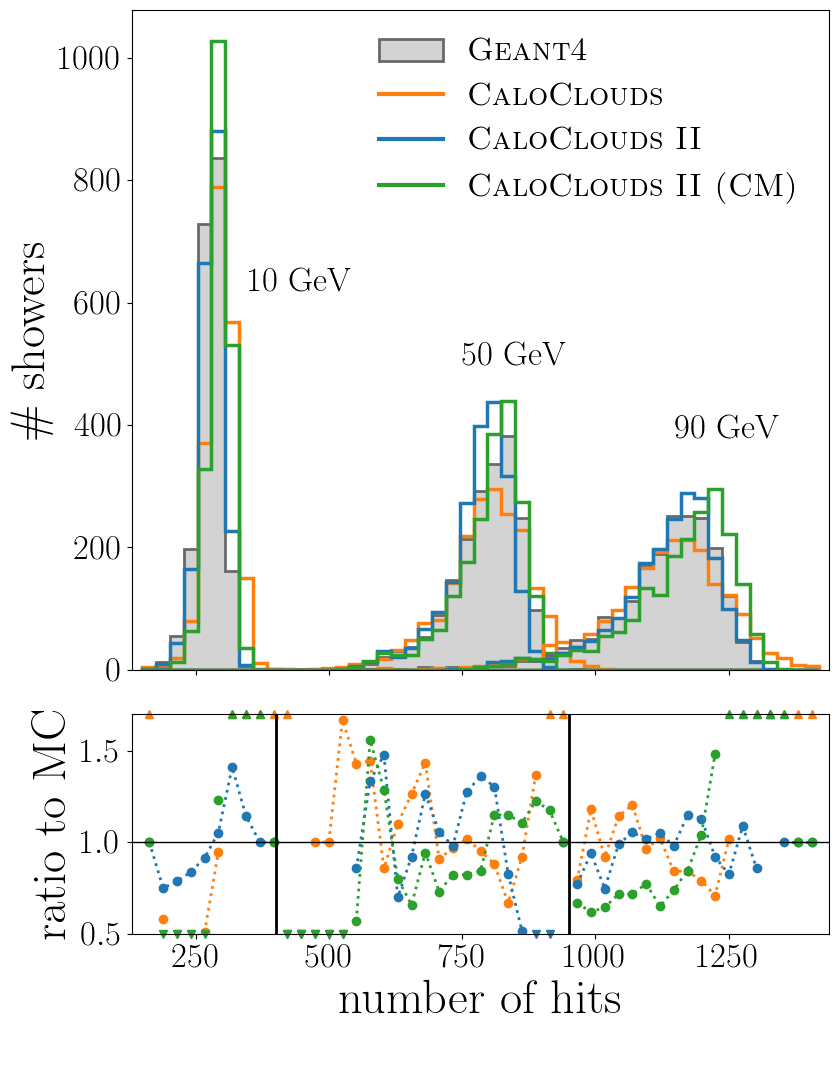

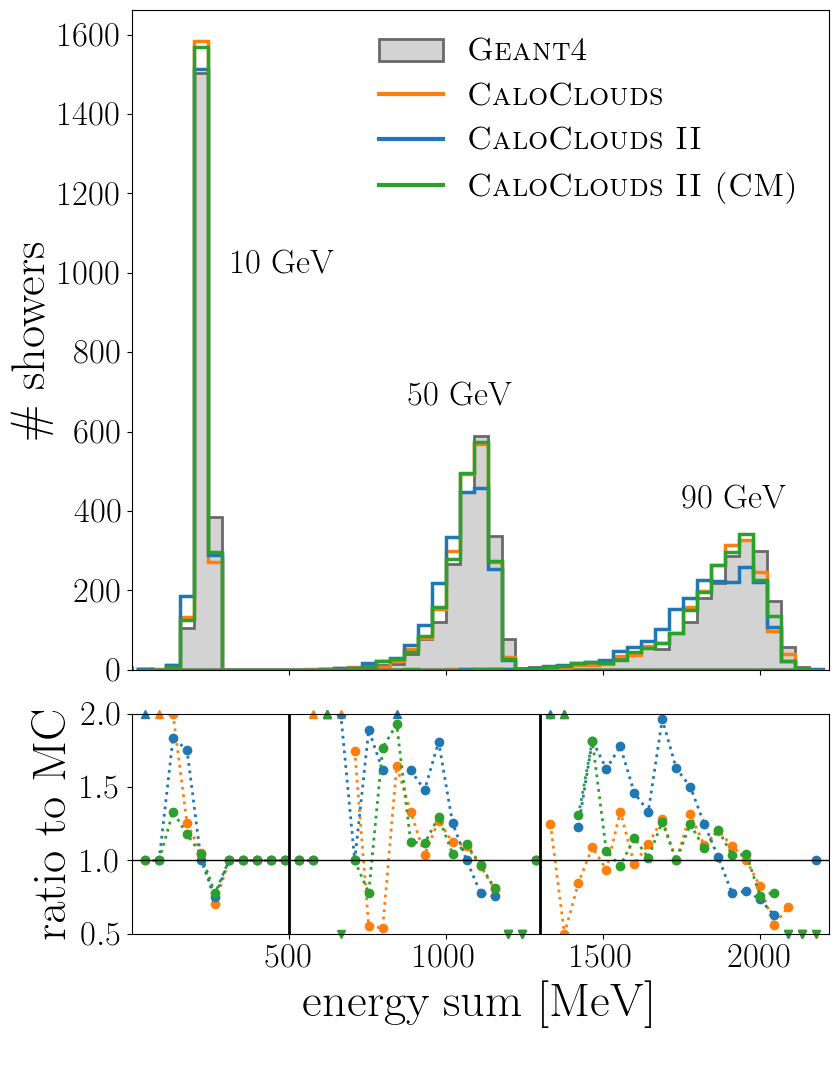

In [27]:
importlib.reload(plotting)

plotting.get_plots_from_observables_singleE(real_list_list, fakes_list_list, labels=[real_label, ddpm_label, edm_label, cm_label])